In [9]:
import numpy as np
import matplotlib.pyplot as plt

In [10]:
data = np.genfromtxt('./ASTR19_F24_group_project_data.txt', dtype=[('day', 'i8'), ('time', 'U6'), ('height', 'f8')])

def tide_model(x, a, b, c, d, e, f, g):
    return (a * np.sin(b * x + c)) + (d * np.sin(e * x + f)) + g

t_numeric = np.array([int(h) + int(m) / 60 for t in data['time'] for h, m in [t.split(':')]])

params = [1.0, 1.0, 0.0, 1.0, 0.5, 0.0, 0.0]
residuals = data['height'] - tide_model(t_numeric, *params)
tsunami_deviation = 2
std_residuals = 1.0 
residuals_with_tsunami = np.append(residuals, 2)

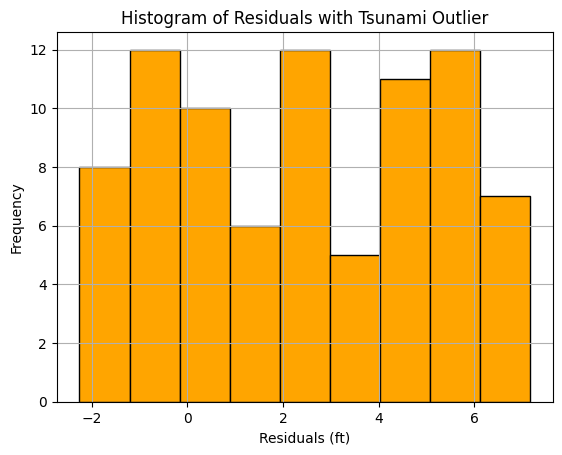

In [11]:
bins = int(np.sqrt(len(residuals_with_tsunami)))  
plt.hist(residuals_with_tsunami, bins=bins, color='orange', edgecolor='black')
plt.xlabel('Residuals (ft)')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals with Tsunami Outlier')
plt.grid()
plt.show()

In [12]:
tsunami_std_deviation = tsunami_deviation / std_residuals
print(f"Tsunami deviation in terms of standard deviations: {tsunami_std_deviation:.2f}")

Tsunami deviation in terms of standard deviations: 2.00
